<a href="https://colab.research.google.com/github/PriyankaHotchandani/MLnow_2.0/blob/main/3a_Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd '/content/drive/MyDrive/ML-GirlScript/LiveCodingSessions/03_LinearRegression/Dataset'

/content/drive/MyDrive/ML-GirlScript/LiveCodingSessions/03_LinearRegression/Dataset


In [5]:
ls

datasetsatisfaction.csv


In [7]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [8]:
patientData = pd.read_csv('datasetsatisfaction.csv')

In [9]:
patientData.head(10)

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
3,2.0,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,1.0
4,3.0,4.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0,1.0
5,2.0,2.0,3.0,4.0,1.0,1.0,4.0,2.0,3.0,3.0,3.0,3.0,4.0,2.0,3.0,2.0,3.0
6,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,3.0
7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0
8,2.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0
9,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


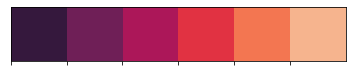

In [17]:
import seaborn as sns
sns.palplot(sns.color_palette('rocket'))

In [20]:
print(f'''There are {len(patientData.columns)} in the given dataset about patient satisfaction namely, 

{patientData.columns}''')

There are 17 in the given dataset about patient satisfaction namely, 

Index(['satisfaction in RM', 'Check up appointment', 'Time waiting',
       'Admin procedures', 'Hygiene and cleaning', 'Time of appointment',
       'Quality/experience dr.', 'Specialists avaliable',
       'Communication with dr', 'Exact diagnosis', 'Modern equipment',
       'friendly health care workers', 'lab services', 'avaliablity of drugs',
       'waiting rooms', 'hospital rooms quality',
       'parking, playing rooms, caffes'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


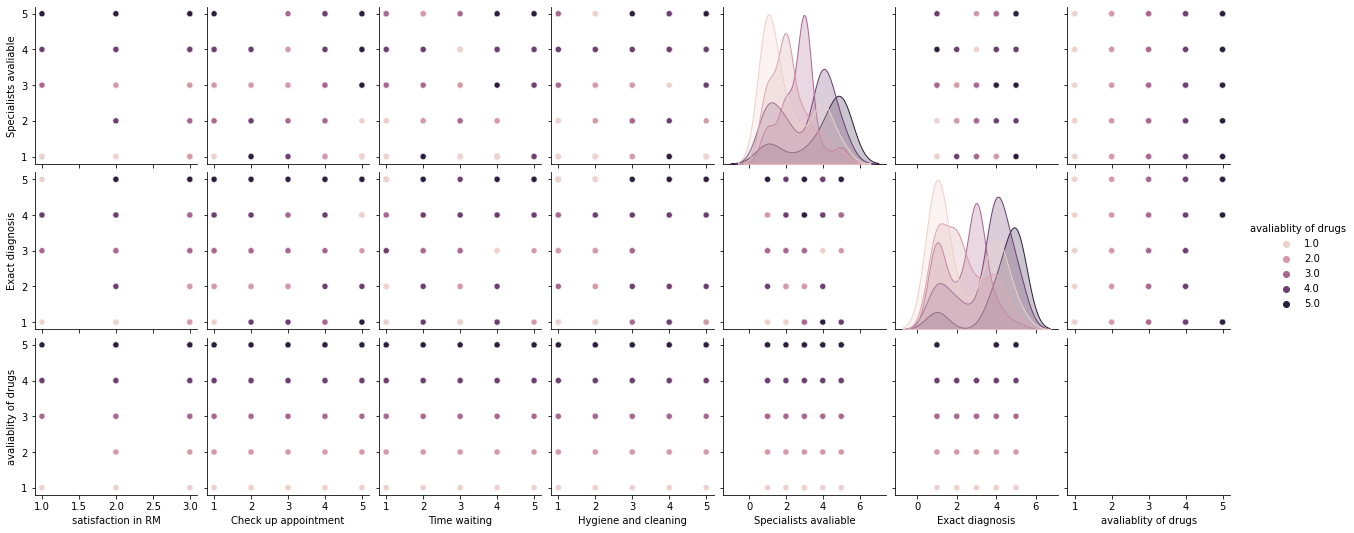

In [27]:

sns.pairplot(patientData,
             x_vars = ['satisfaction in RM', 'Check up appointment', 'Time waiting', 'Hygiene and cleaning', 'Specialists avaliable', 'Exact diagnosis', 'avaliablity of drugs'],
             y_vars = ['Specialists avaliable', 'Exact diagnosis', 'avaliablity of drugs'],
       diag_kind='auto', hue='avaliablity of drugs'
             )

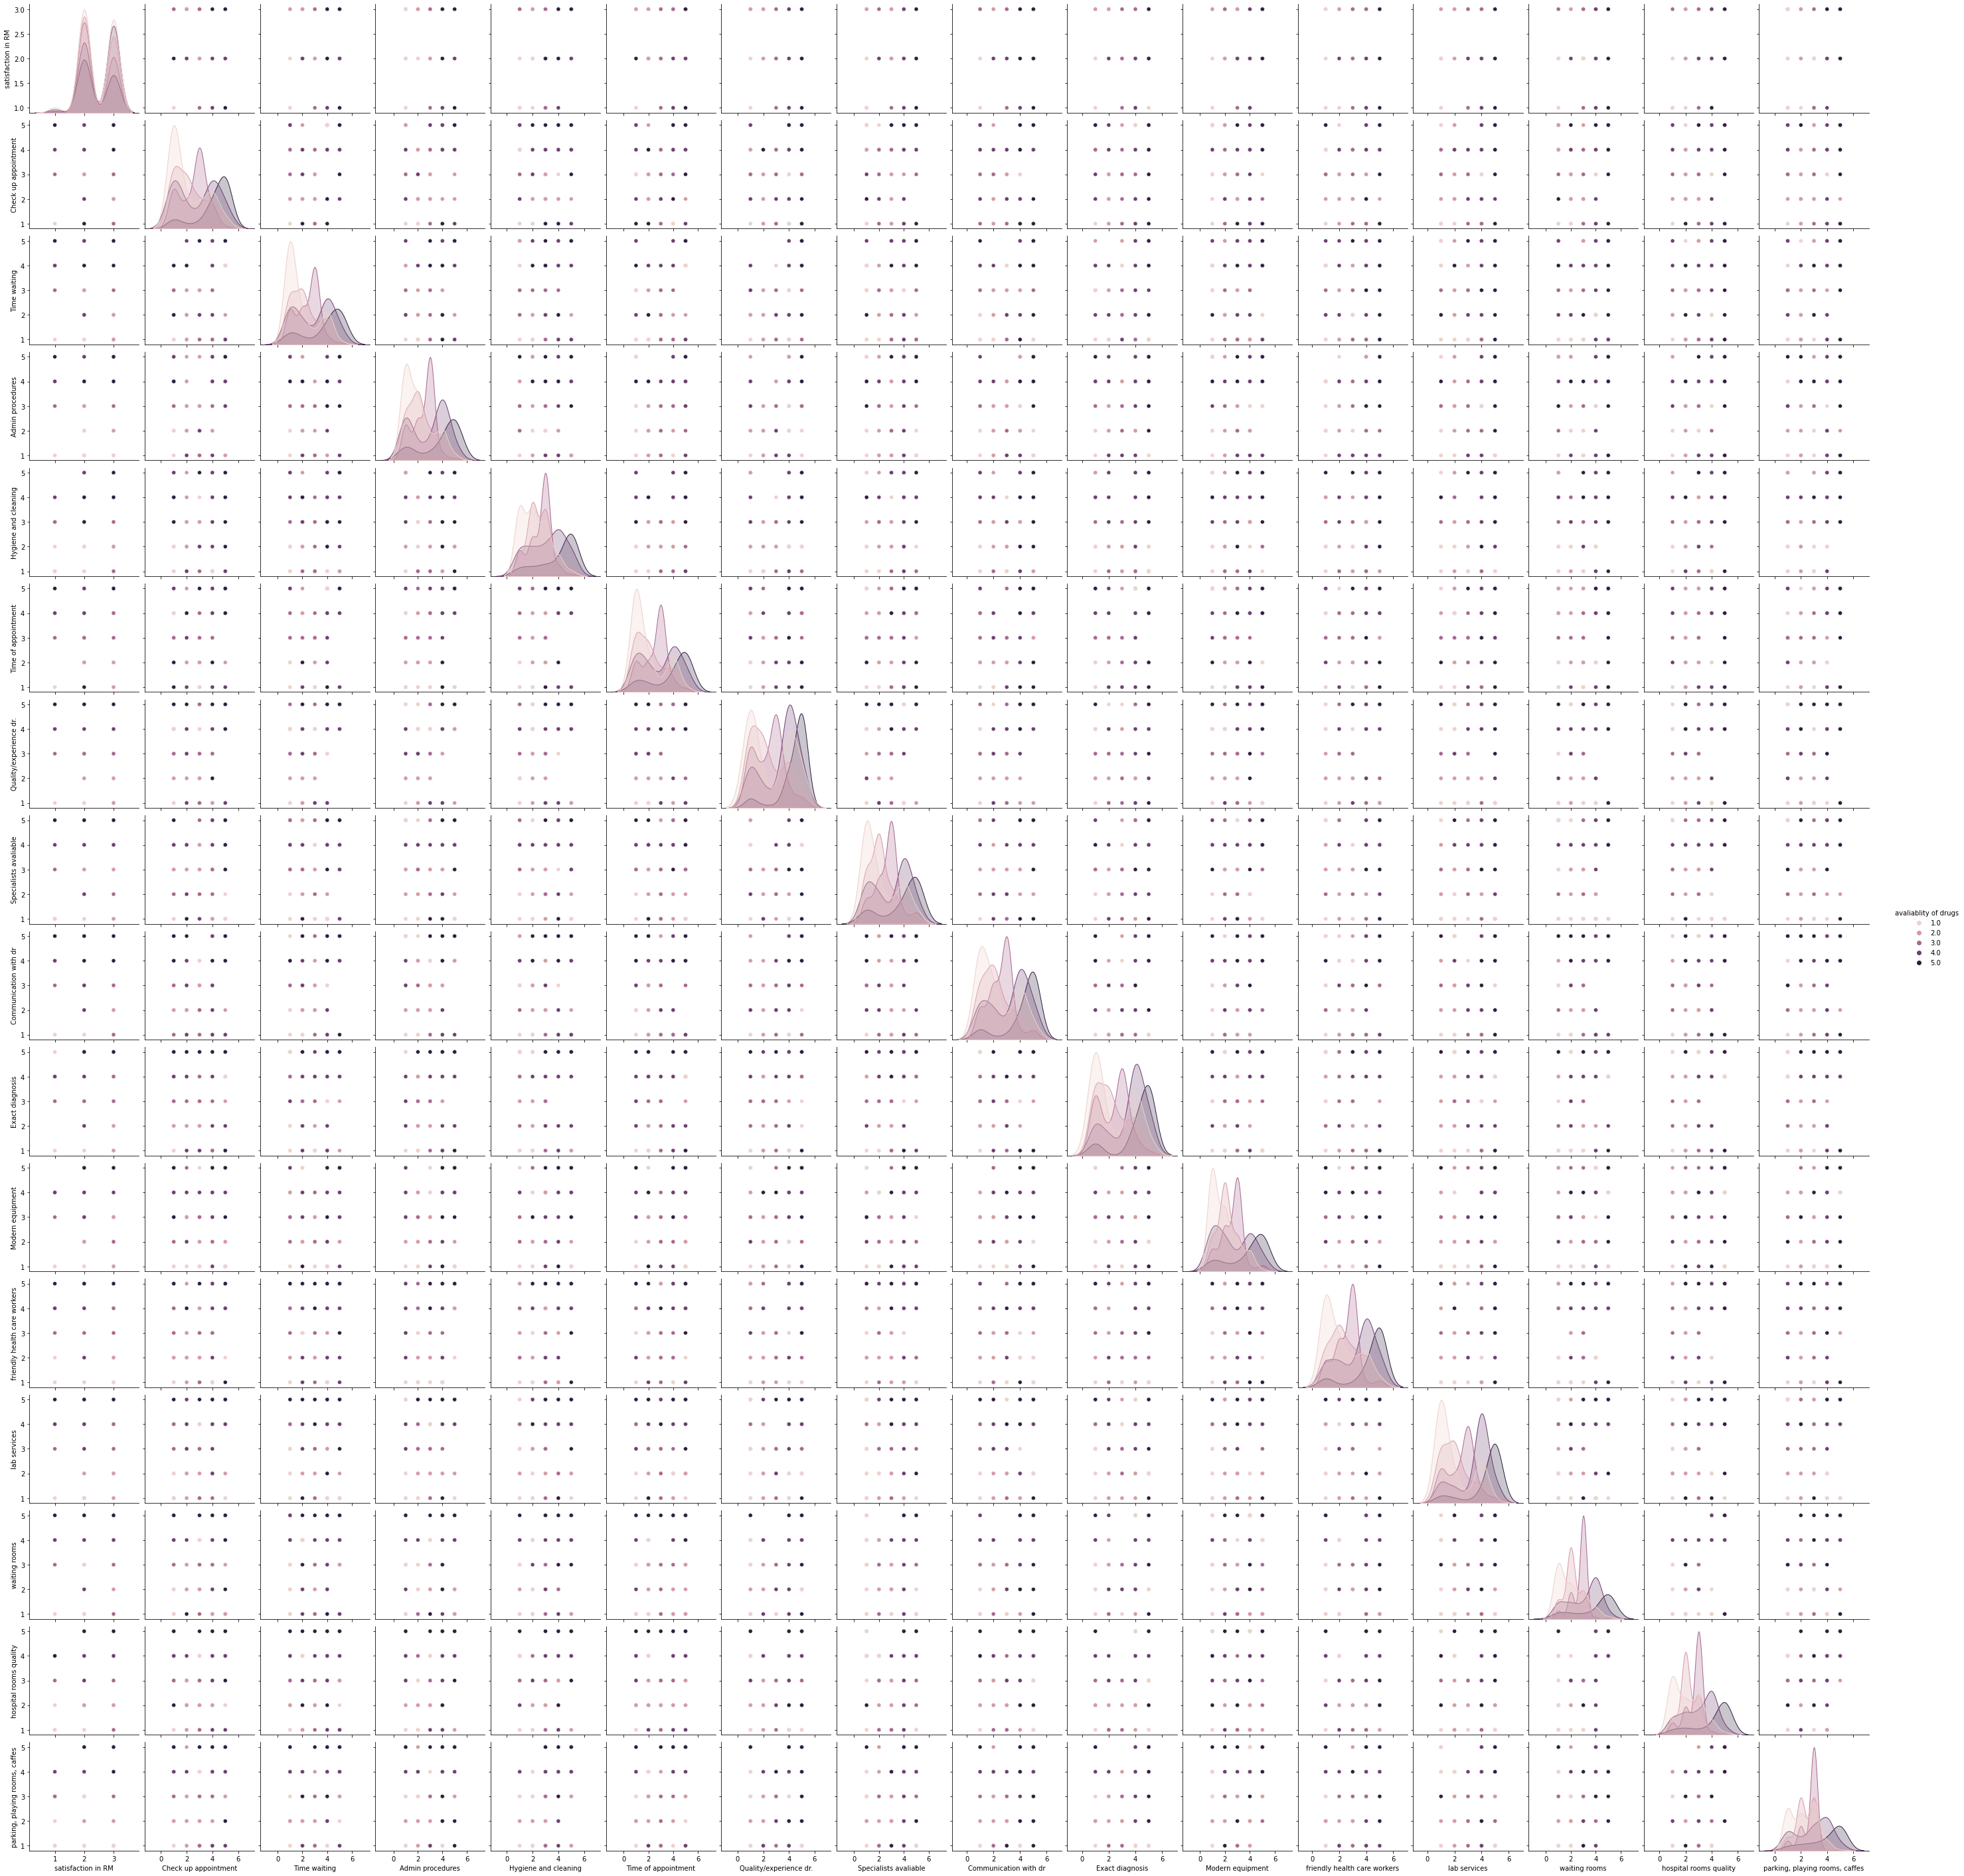

In [25]:
sns.pairplot(patientData,
             x_vars = ['satisfaction in RM', 'Check up appointment', 'Time waiting',
       'Admin procedures', 'Hygiene and cleaning', 'Time of appointment',
       'Quality/experience dr.', 'Specialists avaliable',
       'Communication with dr', 'Exact diagnosis', 'Modern equipment',
       'friendly health care workers', 'lab services', 'waiting rooms', 'hospital rooms quality',
       'parking, playing rooms, caffes'],
             y_vars = ['satisfaction in RM', 'Check up appointment', 'Time waiting',
       'Admin procedures', 'Hygiene and cleaning', 'Time of appointment',
       'Quality/experience dr.', 'Specialists avaliable',
       'Communication with dr', 'Exact diagnosis', 'Modern equipment',
       'friendly health care workers', 'lab services', 'waiting rooms', 'hospital rooms quality',
       'parking, playing rooms, caffes'],
       diag_kind='kde', hue='avaliablity of drugs'
             )

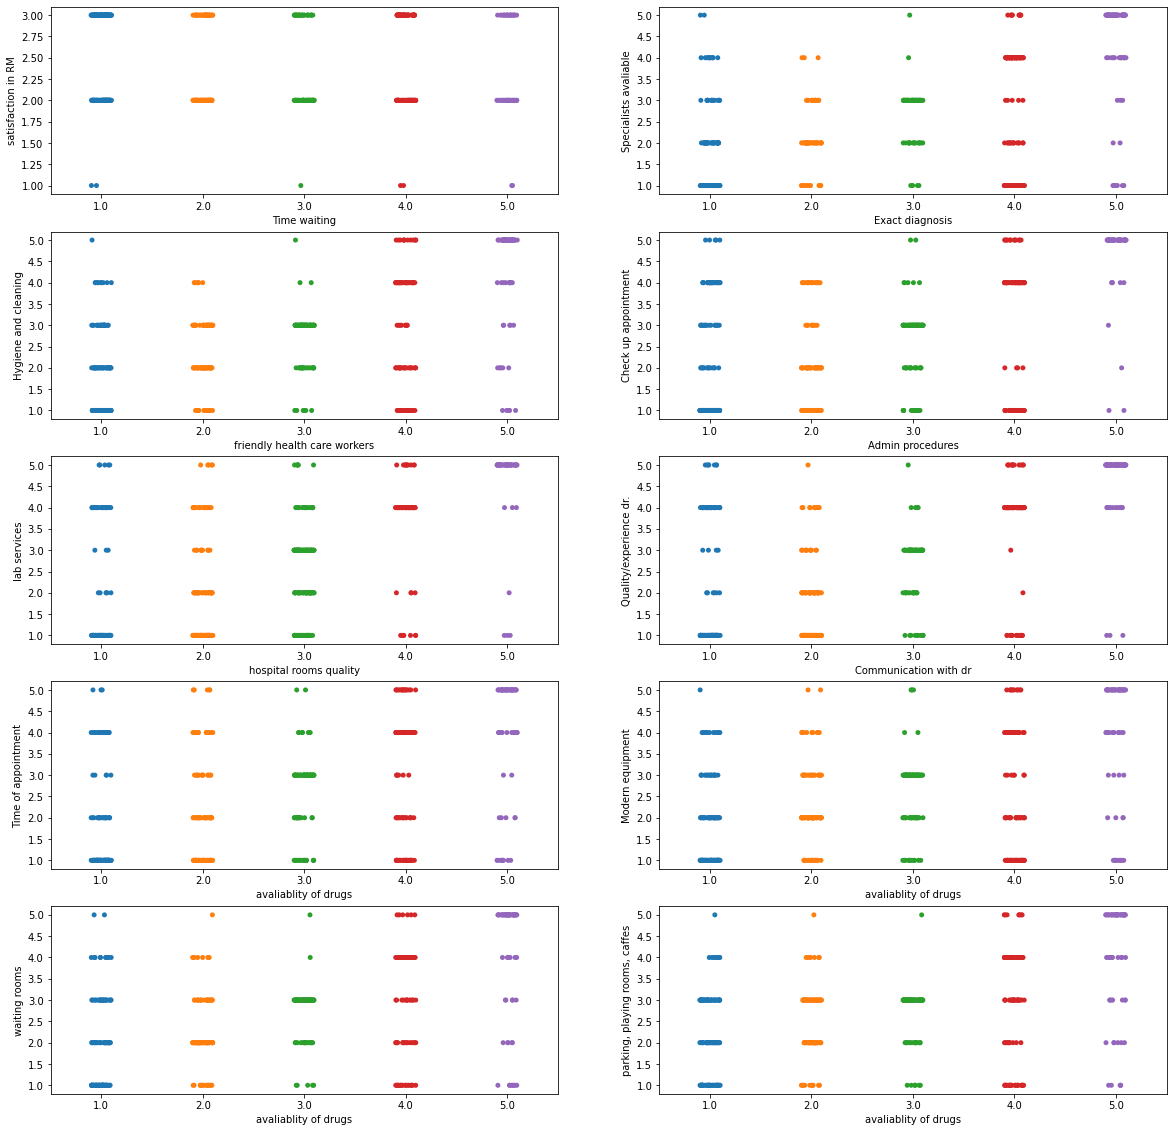

In [32]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(5,2, figsize=(20,20))
sns.stripplot(y='satisfaction in RM', x='Time waiting', data=patientData, hue=None, ax=axarr[0][0])
sns.stripplot(y='Check up appointment', x='Admin procedures', data=patientData, hue=None, ax=axarr[1][1])
sns.stripplot(y='Hygiene and cleaning', x='friendly health care workers', data=patientData, hue=None, ax=axarr[1][0])
sns.stripplot(y='Specialists avaliable', x='Exact diagnosis', data=patientData, hue=None,  ax=axarr[0][1])
sns.stripplot(y='lab services', x='hospital rooms quality', data=patientData, hue=None, ax=axarr[2][0])
sns.stripplot(y='Quality/experience dr.', x='Communication with dr', data=patientData, hue=None, ax=axarr[2][1])
sns.stripplot(y='Time of appointment', x='avaliablity of drugs', data=patientData, hue=None, ax=axarr[3][0])
sns.stripplot(y='Modern equipment', x='avaliablity of drugs', data=patientData, hue=None, ax=axarr[3][1])
sns.stripplot(y='waiting rooms', x='avaliablity of drugs', data=patientData, hue=None, ax=axarr[4][0])
sns.stripplot(y='parking, playing rooms, caffes', x='avaliablity of drugs', data=patientData, hue=None, ax=axarr[4][1])


In [37]:
uniPatientData = patientData[['Time of appointment', 'Exact diagnosis']]
uniPatientData.head(5)

,Time of appointment,Exact diagnosis
0,1.0,1.0
1,2.0,1.0
2,2.0,4.0
3,2.0,4.0
4,1.0,5.0


In [38]:
uniPatientData.to_csv('univariate_patientData_2.csv')

In [39]:
ls

datasetsatisfaction.csv  univariate_patientData_2.csv


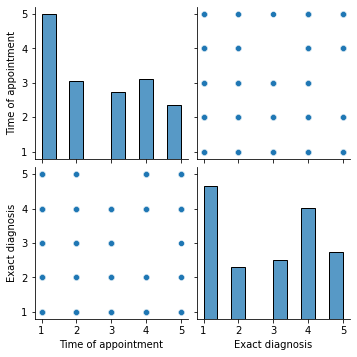

In [42]:
sns.pairplot(uniPatientData,
             x_vars = ['Time of appointment', 'Exact diagnosis'],
             y_vars =  ['Time of appointment', 'Exact diagnosis'],
       diag_kind='auto'
             )

In [43]:
#70-30 train-test percent split

trainData = uniPatientData.sample(frac=0.7, random_state=0) 
testData = uniPatientData.drop(trainData.index)

print(trainData.head())
print(testData.head())

     Time of appointment  Exact diagnosis
124                  1.0              4.0
54                   4.0              5.0
298                  5.0              5.0
311                  2.0              1.0
230                  5.0              4.0
    Time of appointment  Exact diagnosis
0                   1.0              1.0
9                   3.0              3.0
11                  2.0              2.0
23                  1.0              3.0
25                  4.0              5.0


In [44]:
print(trainData.shape)
print(testData.shape)

(317, 2)
(136, 2)


In [45]:
trainFeatures = trainData.copy()
testFeatures = testData.copy()

print(trainFeatures.head())
print(testFeatures.head())

     Time of appointment  Exact diagnosis
124                  1.0              4.0
54                   4.0              5.0
298                  5.0              5.0
311                  2.0              1.0
230                  5.0              4.0
    Time of appointment  Exact diagnosis
0                   1.0              1.0
9                   3.0              3.0
11                  2.0              2.0
23                  1.0              3.0
25                  4.0              5.0


In [46]:
#removing the Exact diagnosis column and saving it into the labels variable

trainLabels = trainFeatures.pop('Exact diagnosis')
testLabels = testFeatures.pop('Exact diagnosis')

print(trainLabels.head())
print(testLabels.head())

124    4.0
54     5.0
298    5.0
311    1.0
230    4.0
Name: Exact diagnosis, dtype: float64
0     1.0
9     3.0
11    2.0
23    3.0
25    5.0
Name: Exact diagnosis, dtype: float64


In [47]:
print(trainFeatures.head())
print(testFeatures.head())

     Time of appointment
124                  1.0
54                   4.0
298                  5.0
311                  2.0
230                  5.0
    Time of appointment
0                   1.0
9                   3.0
11                  2.0
23                  1.0
25                  4.0


In [48]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [61]:
model.compile(
    loss = 'mean_squared_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [62]:
numEpochs = 10
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/10
10/10 [==============================] - 1s 85ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_